Data Understanding

##Imports

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from collections import Counter
import spacy

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read datasets

In [ ]:
df = pd.read_excel("/content/drive/Shareddrives/TextAnalytics_project/dataset_ironita_2018/test&training_released/training_ironita2018/training_ironita2018.xlsx")
df_test = pd.read_excel("/content/drive/Shareddrives/TextAnalytics_project/dataset_ironita_2018/test&training_released/test_ironita2018/test_gold_ironita2018.xlsx")

In [ ]:
df.head()

,id,text,irony,sarcasm,topic
0,8.111568e+17,"Zurigo, trovato morto il presunto autore della...",0.0,0.0,HSC
1,8.111831e+17,"Zurigo, trovato morto il presunto autore della...",0.0,0.0,HSC
2,8.263806e+17,"Zingari..i soliti ""MERDOSI""..#cacciamolivia Ro...",0.0,0.0,HSC
3,8.448712e+17,"Zingari di merda,tutti al muro...bastardi Spar...",0.0,0.0,HSC
4,5.097128e+17,zero notizie decreto #tfaordinario II ciclo ze...,1.0,0.0,TW-BS


In [ ]:
df_test.head()

,id,text,irony,sarcasm,topic
0,5.955245e+17,-Prendere i libri in copisteria-Fare la spesa-...,1.0,0.0,TWITA
1,5.784681e+17,...comunque con una crociera Costa se non ti a...,1.0,0.0,HSC
2,5.777915e+17,"“@TweetComici: Ogni ragazza: \""non sono una ra...",1.0,1.0,TWITA
3,5.074649e+17,“La buona scuola”? Fa gli errori di grammatica...,0.0,0.0,TW-BS
4,8.398961e+17,“Vi hanno sfrattato? Andate al campo rom in un...,0.0,0.0,HSC


##Data Exploration

In [ ]:
df["irony"].value_counts()

1.0    2023
0.0    1954
Name: irony, dtype: int64

In [ ]:
df["sarcasm"].value_counts()

0.0    3064
1.0     913
Name: sarcasm, dtype: int64

In [ ]:
len(df[(df["irony"]==1.0) & (df["sarcasm"]==1.0)])

913

In [ ]:
(df[(df["irony"]==1.0) & (df["sarcasm"]==1.0)].index == df[df["sarcasm"]==1.0].index).all()

True

## Topic Distribution

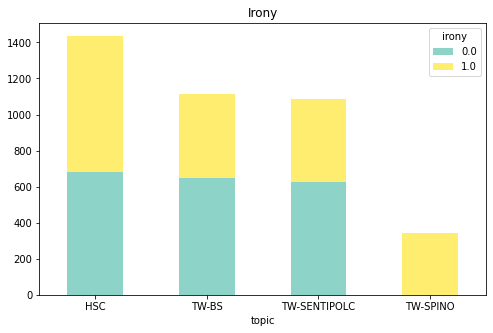

In [ ]:
pd.crosstab(index = df["topic"],columns = df["irony"]).plot(kind='bar',
                figsize=(8, 5),rot=0,stacked=True,title="Irony", colormap="Set3")

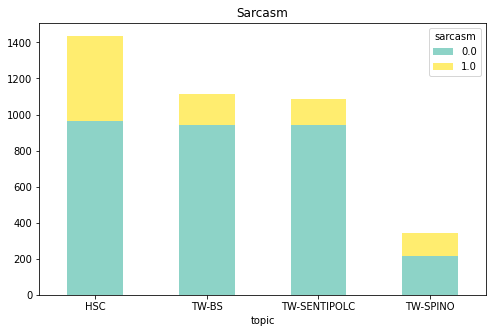

In [ ]:
pd.crosstab(index = df["topic"],columns = df["sarcasm"]).plot(kind='bar',
                figsize=(8, 5),rot=0,stacked=True,title="Sarcasm", colormap="Set3")

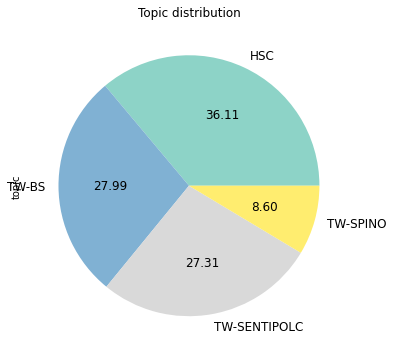

In [ ]:
counts = df["topic"].value_counts()
counts.plot(kind="pie",
            labels=counts.index.tolist(), autopct='%.2f',
                fontsize=12, figsize=(6, 6), title="Topic distribution", colormap="Set3")

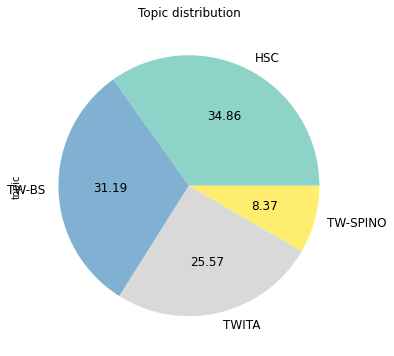

In [ ]:
counts = df_test["topic"].value_counts()
counts.plot(kind="pie",
            labels=counts.index.tolist(), autopct='%.2f',
                fontsize=12, figsize=(6, 6), title="Topic distribution", colormap="Set3" )

In [ ]:
df["type"] = df['irony'] + df['sarcasm']

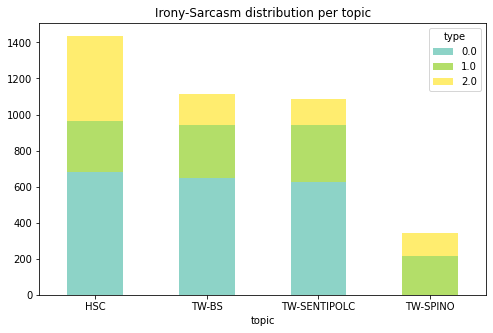

In [ ]:
pd.crosstab(index = df["topic"],columns = df["type"]).plot(kind='bar',
                figsize=(8, 5),rot=0,stacked=True,title="Irony-Sarcasm distribution per topic", colormap="Set3")

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df[df['irony']==1]['word_count'].mean()) 
print(df[df['irony']==0]['word_count'].mean()) 
print(df[df['sarcasm']==1]['word_count'].mean())
print(df[df['sarcasm']==0]['word_count'].mean())

16.956500247157688
15.871545547594678
17.646221248630887
16.05907310704961


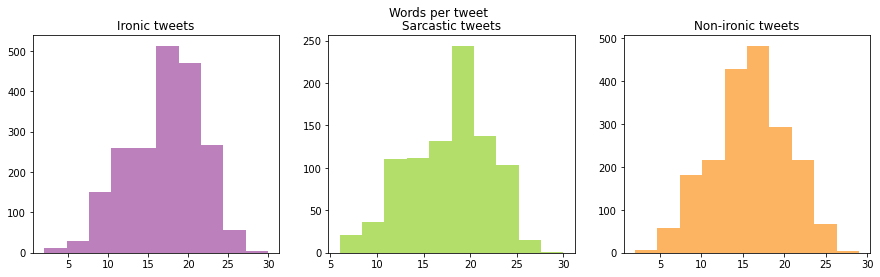

In [ ]:
mycmap = plt.get_cmap("Set3")
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))
train_words=df[df['irony']==1]['word_count']
ax1.hist(train_words,color=mycmap.colors[9])
ax1.set_title('Ironic tweets')
train_words=df[df['sarcasm']==1]['word_count']
ax2.hist(train_words,color=mycmap.colors[6])
ax2.set_title('Sarcastic tweets')
train_words=df[df['irony']==0]['word_count']
ax3.hist(train_words,color=mycmap.colors[5])
ax3.set_title('Non-ironic tweets')
fig.suptitle('Words per tweet')
plt.show()

## Words Distribution

Concatenate all tweets

In [ ]:
text = df["text"].str.cat(sep=' ')

In [ ]:
nltk.download('punkt')
tokenized_text = nltk.word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
freq_dist = nltk.FreqDist(tokenized_text)

In [ ]:
freq_dist.most_common(20)

[('#', 3534),
 (':', 2516),
 ('.', 2235),
 ('@', 2114),
 (',', 1962),
 ('di', 1620),
 ('e', 1098),
 ('a', 1029),
 ('che', 981),
 ('il', 974),
 ('?', 966),
 ('la', 949),
 ('!', 919),
 ('http', 786),
 ('labuonascuola', 756),
 ('Monti', 754),
 ('è', 751),
 ('i', 746),
 ('per', 739),
 ('in', 697)]

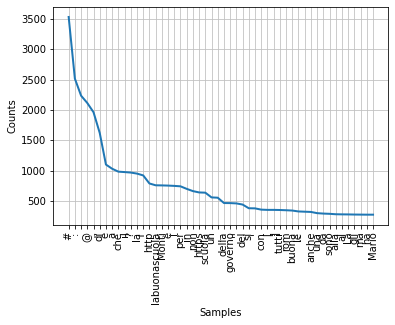

In [ ]:
freq_dist.plot(50)

In [ ]:
nltk_text = nltk.Text(tokenized_text)
nltk_text.concordance('Zingari')

Displaying 11 of 11 matches:
w tramite https : //t.co/zAAl3RtO5F Zingari .. i soliti `` MERDOSI '' .. # cacc
cittadini https : //t.co/j6LYylIkhe Zingari di merda , tutti al muro ... bastar
gomberi dei campi rom : “ Anche gli zingari hanno diritto alla casa ” - SkyTg24
ne modenese paga la benzina per gli zingari che portano i bambini dai campi rom
i quando al # tg per descrivere gli zingari - rom , usano `` forte accento dell
Colonnama se è assodato che i rom , zingari , vengono in ITALIA x rubare , perc
 % # cvd # M5s oltre che tutelare : zingari nomadi rom , con questa mossa ha fa
moderno essere pro # profughi pro # zingari con la camicia alla # Renzi @ suert
 codice penale ma chi difende i rom zingari clandestini ? siete voi caro @ MPen
impone '' eufemismi ! No ci sto ! I ZINGARI sono parassiti eladri @ matteosalvi
a scherziamo prima i musulmani e gì zingari poi gli extra comunitari e poi e po


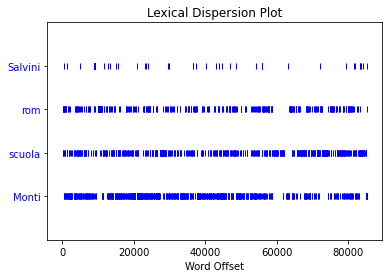

In [ ]:
nltk_text.dispersion_plot(['Salvini', 'rom', 'scuola', 'Monti'])

## Emoji distribution

Emoji frequency in irony tweets

In [ ]:
irony_text = df[df["irony"] == 1]["text"]

In [ ]:
list_emoticon_irony = []

for tweet in irony_text:
  match = re.search("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", tweet)

  if match:
    #print('found', match.group()) ## 'found word:cat'
    for emoticon in match.group():
      list_emoticon_irony.append(emoticon)

dict_emoticon_irony = Counter(list_emoticon_irony).most_common()
dict_emoticon_irony

[('😂', 23),
 ('�', 18),
 ('👏', 18),
 ('😁', 7),
 ('🤔', 5),
 ('😨', 5),
 ('😳', 4),
 ('👎', 4),
 ('️', 3),
 ('😅', 3),
 ('🐐', 3),
 ('😏', 3),
 ('😄', 3),
 ('😱', 2),
 ('😔', 2),
 ('😟', 2),
 ('😉', 2),
 ('😊', 2),
 ('😜', 2),
 ('🤦', 1),
 ('\u200d', 1),
 ('♂', 1),
 ('😡', 1),
 ('😲', 1),
 ('😶', 1),
 ('🙈', 1),
 ('😋', 1),
 ('☺', 1),
 ('😃', 1),
 ('😎', 1),
 ('😕', 1),
 ('😇', 1),
 ('😞', 1),
 ('🙄', 1),
 ('🤓', 1),
 ('😹', 1),
 ('💩', 1),
 ('😷', 1),
 ('👍', 1),
 ('▶', 1),
 ('🤕', 1),
 ('⛪', 1),
 ('😒', 1),
 ('🤐', 1),
 ('😬', 1),
 ('💡', 1),
 ('✔', 1),
 ('🌹', 1)]

Emoji frequency in not ironic text

In [ ]:
not_irony_text = df[df["irony"] == 0]["text"]
not_irony_text

0       Zurigo, trovato morto il presunto autore della...
1       Zurigo, trovato morto il presunto autore della...
2       Zingari..i soliti "MERDOSI"..#cacciamolivia Ro...
3       Zingari di merda,tutti al muro...bastardi Spar...
5       Yemen, primo raid ordinato da Trump: uccisi 14...
                              ...                        
3970    Il posto fisso, che monotonia (Mario #Monti). ...
3972    Casini:Trovare un'intesa tra forze politiche o...
3973    Cambiare tutto per non cambiare niente sembra ...
3974    Alcuni mettono mani nelle tasche degli italian...
3976    @VITAnonprofit CLAMOROSO: MARIO MONTI. L'Itali...
Name: text, Length: 1954, dtype: object

In [ ]:
list_emoticon = []

for tweet in not_irony_text:
  match = re.search("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", tweet)

  if match:
    #print('found', match.group()) ## 'found word:cat'
    for emoticon in match.group():
      list_emoticon.append(emoticon)

dict_emoticon_not_ironic = Counter(list_emoticon).most_common()
dict_emoticon_not_ironic

[('👍', 3),
 ('💖', 2),
 ('️', 2),
 ('🙄', 2),
 ('😂', 2),
 ('😊', 1),
 ('😷', 1),
 ('😈', 1),
 ('�', 1),
 ('💥', 1),
 ('🔹', 1),
 ('🇬', 1),
 ('🇧', 1),
 ('🇸', 1),
 ('🇾', 1),
 ('🙂', 1),
 ('😳', 1),
 ('☺', 1),
 ('🏼', 1),
 ('💪', 1),
 ('📍', 1),
 ('😀', 1),
 ('✌', 1),
 ('👎', 1),
 ('😑', 1)]

Emoji frequency in tweets

In [ ]:
text_full = df["text"]
text_full

0       Zurigo, trovato morto il presunto autore della...
1       Zurigo, trovato morto il presunto autore della...
2       Zingari..i soliti "MERDOSI"..#cacciamolivia Ro...
3       Zingari di merda,tutti al muro...bastardi Spar...
4       zero notizie decreto #tfaordinario II ciclo ze...
                              ...                        
3972    Casini:Trovare un'intesa tra forze politiche o...
3973    Cambiare tutto per non cambiare niente sembra ...
3974    Alcuni mettono mani nelle tasche degli italian...
3975    A parte che la dieta di #Salvini  dovrebbe ess...
3976    @VITAnonprofit CLAMOROSO: MARIO MONTI. L'Itali...
Name: text, Length: 3977, dtype: object

In [ ]:
list_emoticon = []

for tweet in text_full:
  match = re.search("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", tweet)

  if match:
    #print('found', match.group()) ## 'found word:cat'
    for emoticon in match.group():
      list_emoticon.append(emoticon)

dict_emoticon = Counter(list_emoticon).most_common()
dict_emoticon

[('😂', 25),
 ('�', 19),
 ('👏', 18),
 ('😁', 7),
 ('️', 5),
 ('😳', 5),
 ('👎', 5),
 ('🤔', 5),
 ('😨', 5),
 ('👍', 4),
 ('😅', 3),
 ('🐐', 3),
 ('😊', 3),
 ('😏', 3),
 ('🙄', 3),
 ('😄', 3),
 ('😱', 2),
 ('😔', 2),
 ('💖', 2),
 ('😷', 2),
 ('☺', 2),
 ('😟', 2),
 ('😉', 2),
 ('😜', 2),
 ('🤦', 1),
 ('\u200d', 1),
 ('♂', 1),
 ('😡', 1),
 ('😲', 1),
 ('😶', 1),
 ('🙈', 1),
 ('😋', 1),
 ('😃', 1),
 ('😎', 1),
 ('😕', 1),
 ('😇', 1),
 ('😞', 1),
 ('🤓', 1),
 ('😈', 1),
 ('💥', 1),
 ('😹', 1),
 ('🔹', 1),
 ('💩', 1),
 ('🇬', 1),
 ('🇧', 1),
 ('🇸', 1),
 ('🇾', 1),
 ('▶', 1),
 ('🙂', 1),
 ('🤕', 1),
 ('⛪', 1),
 ('🏼', 1),
 ('💪', 1),
 ('📍', 1),
 ('😒', 1),
 ('🤐', 1),
 ('😬', 1),
 ('😀', 1),
 ('✌', 1),
 ('😑', 1),
 ('💡', 1),
 ('✔', 1),
 ('🌹', 1)]

Ratio (emoji in ironic tweets / emoji in tweets)

In [ ]:
dict_emoticon = dict(dict_emoticon)
dict_emoticon_irony = dict(dict_emoticon_irony)
emoji_ratio = []
for emoji in dict_emoticon:
    try:
      ratio = dict_emoticon_irony[emoji] / dict_emoticon[emoji]
      emoji_ratio.append((emoji, round(ratio, 1)))
      print(emoji, round(ratio, 1))
    except:
      pass

😂 0.9
� 0.9
👏 1.0
😁 1.0
️ 0.6
😳 0.8
👎 0.8
🤔 1.0
😨 1.0
👍 0.2
😅 1.0
🐐 1.0
😊 0.7
😏 1.0
🙄 0.3
😄 1.0
😱 1.0
😔 1.0
😷 0.5
☺ 0.5
😟 1.0
😉 1.0
😜 1.0
🤦 1.0
‍ 1.0
♂ 1.0
😡 1.0
😲 1.0
😶 1.0
🙈 1.0
😋 1.0
😃 1.0
😎 1.0
😕 1.0
😇 1.0
😞 1.0
🤓 1.0
😹 1.0
💩 1.0
▶ 1.0
🤕 1.0
⛪ 1.0
😒 1.0
🤐 1.0
😬 1.0
💡 1.0
✔ 1.0
🌹 1.0


In [ ]:
emoji_ratios = pd.DataFrame(emoji_ratio, columns=["emoji", "ratio"])
emoji_ratios.sort_values(by="ratio", ascending=False)

,emoji,ratio
24,‍,1.0
36,🤓,1.0
27,😲,1.0
28,😶,1.0
29,🙈,1.0
30,😋,1.0
31,😃,1.0
32,😎,1.0
33,😕,1.0
34,😇,1.0


Emoji not used in ironic tweets

In [ ]:
set(dict_emoticon) - set(dict_emoticon_irony)

{'✌', '🇧', '🇬', '🇸', '🇾', '🏼', '💖', '💥', '💪', '📍', '🔹', '😀', '😈', '😑', '🙂'}